# DSCI100 Project: Pulsar Star Prediction and Analysis

## I.Introduction

background

Question

Dataset:
The dataset we will use is the description of sample pulsar candidates collected during High Time Resolution Universe (HTRU) survey. In the dataset, each row represents a single candidate, which contains overall 17897 candidates. The variables in dataset are summarized below:
1. mean_pf: Mean of the integrated profile.

2. sd_pf: Standard deviation of the integrated profile.

3. exk_pf: Excess kurtosis of the integrated profile.

4. skew_pf: Skewness of the integrated profile.

5. mean_ds: Mean of the DM-SNR curve.

6. sd_ds: Standard deviation of the DM-SNR curve.

7. exk_ds: Excess kurtosis of the DM-SNR curve.

8. skew_ds: Skewness of the DM-SNR curve.

9. Class

For Class variable, we labeled every candidate as 1 (positive) and 0 (negative). 

## II.Methods & Results

1.load R package.

In [35]:
install.packages("rlang", version="1.1.0")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [43]:
remove.packages("rlang")

Removing package from ‘/opt/conda/lib/R/library’
(as ‘lib’ is unspecified)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [44]:
install.packages("rlang")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [42]:
library(dplyr)
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(repr)
library(GGally)
library(broom)
library(cowplot)

ERROR: Error: package or namespace load failed for ‘dplyr’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 1.0.4 is already loaded, but >= 1.1.0 is required


2.load and read the raw dataset by URL. Since the raw data doesn't have name on each variable, we need to identify a name for each vavriable by colnames function

In [7]:
url<-"https://raw.githubusercontent.com/LawrenceZzf/DSCI100-G63-Proj1/main/HTRU_2.csv"
HTRU_data<-read_csv(url,col_names=FALSE)
colnames(HTRU_data)=c("mean_pf",
                 "sd_pf",
                 "exk_pf",
                 "skew_pf",
                 "mean_ds",
                 "sd_ds",
                 "exk_ds",
                 "skew_ds",
                 "class")
head(HTRU_data)

ERROR: Error in read_csv(url, col_names = FALSE): could not find function "read_csv"


                                      table2-0-1

### 1.Cluster: Predictor Selection

cluster introduction

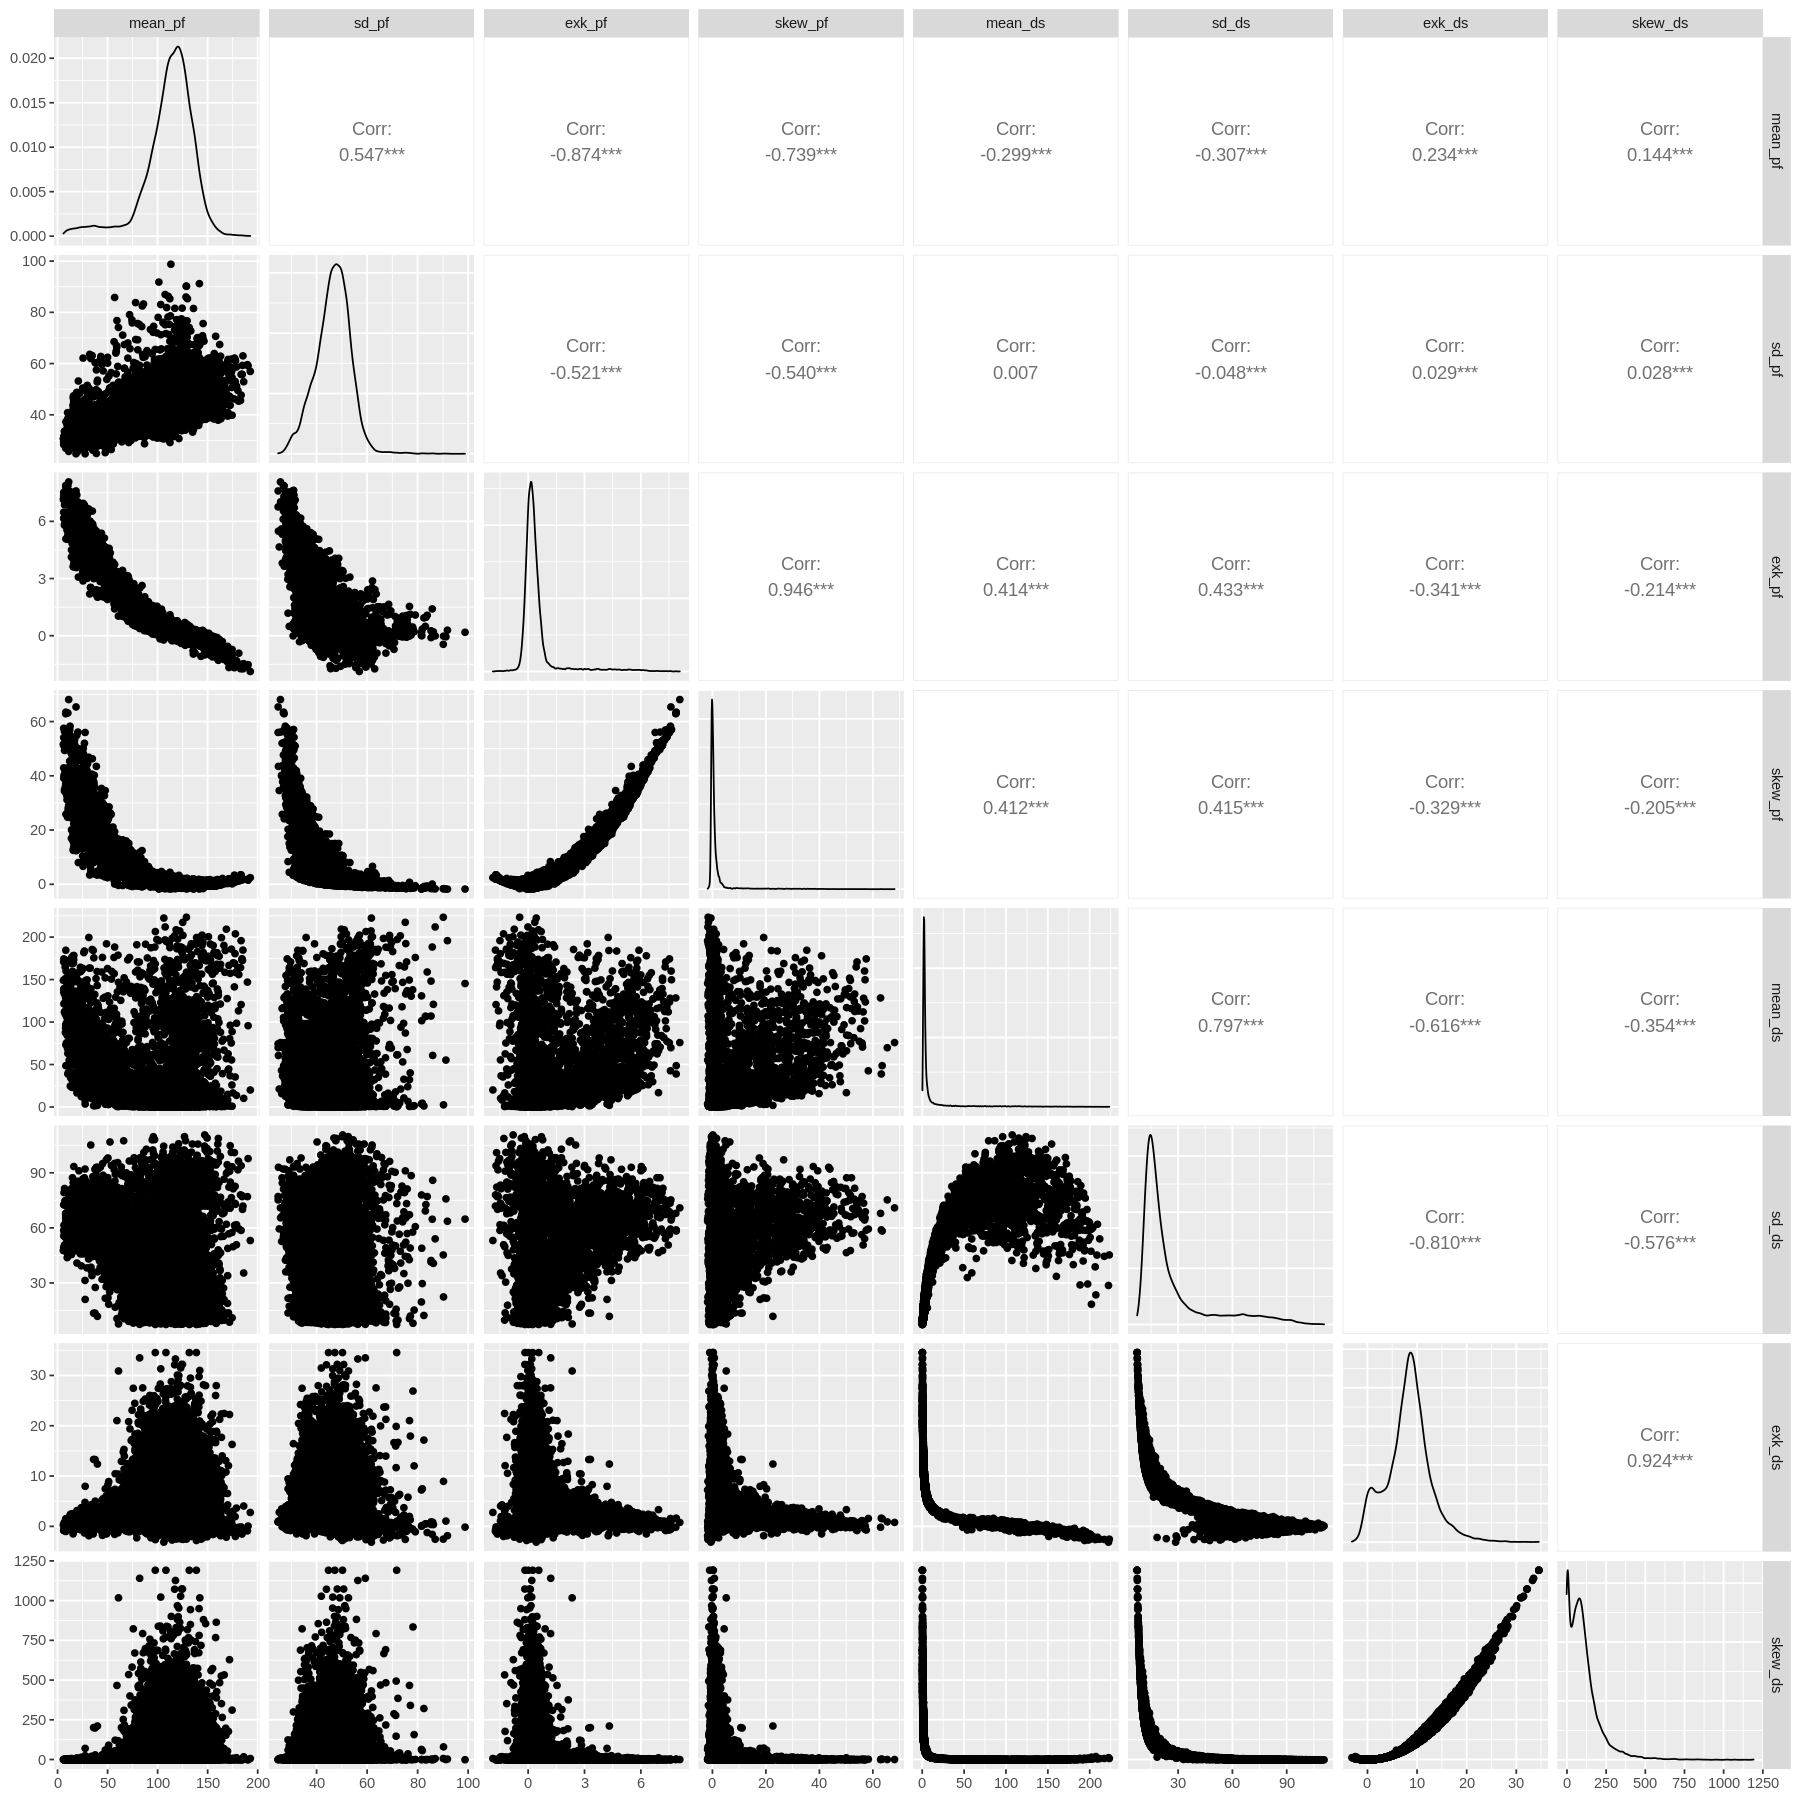

In [12]:
HTRU_data1<-HTRU_data|>
    select(-class)
options(repr.plot.height = 15, repr.plot.width = 15)
HTRU_pairs_plot<-ggpairs(HTRU_data1,columns=1:8)
HTRU_pairs_plot

                                                     figure2-1-1

In [5]:
scaled_HTRU<-HTRU_data1|>
    mutate(across(everything(),scale))

In [6]:
ks<-tibble(k=seq(from=1,to=10,by=1))
set.seed(2025)
HTRU_stats<- ks |>
     rowwise() |>
     mutate(clusts = list(kmeans(scaled_HTRU, nstart=100,center=k)))|>
     mutate(glanced=list(glance(clusts)))|>
     select(-clusts)|>
     unnest(glanced)
HTRU_stats

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 894900)”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in 10 iterations”
Warning message:
“did not converge in

k,totss,tot.withinss,betweenss,iter
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,143176,143176.00,-4.307367e-09,1
2,143176,92209.22,5.096678e+04,1
3,143176,68068.18,7.510782e+04,4
4,143176,53117.85,9.005815e+04,5
5,143176,44216.54,9.895946e+04,5
6,143176,39131.05,1.040450e+05,4
7,143176,34349.87,1.088261e+05,7
8,143176,31188.33,1.119877e+05,6
9,143176,29186.67,1.139893e+05,5


                  table2-1-1

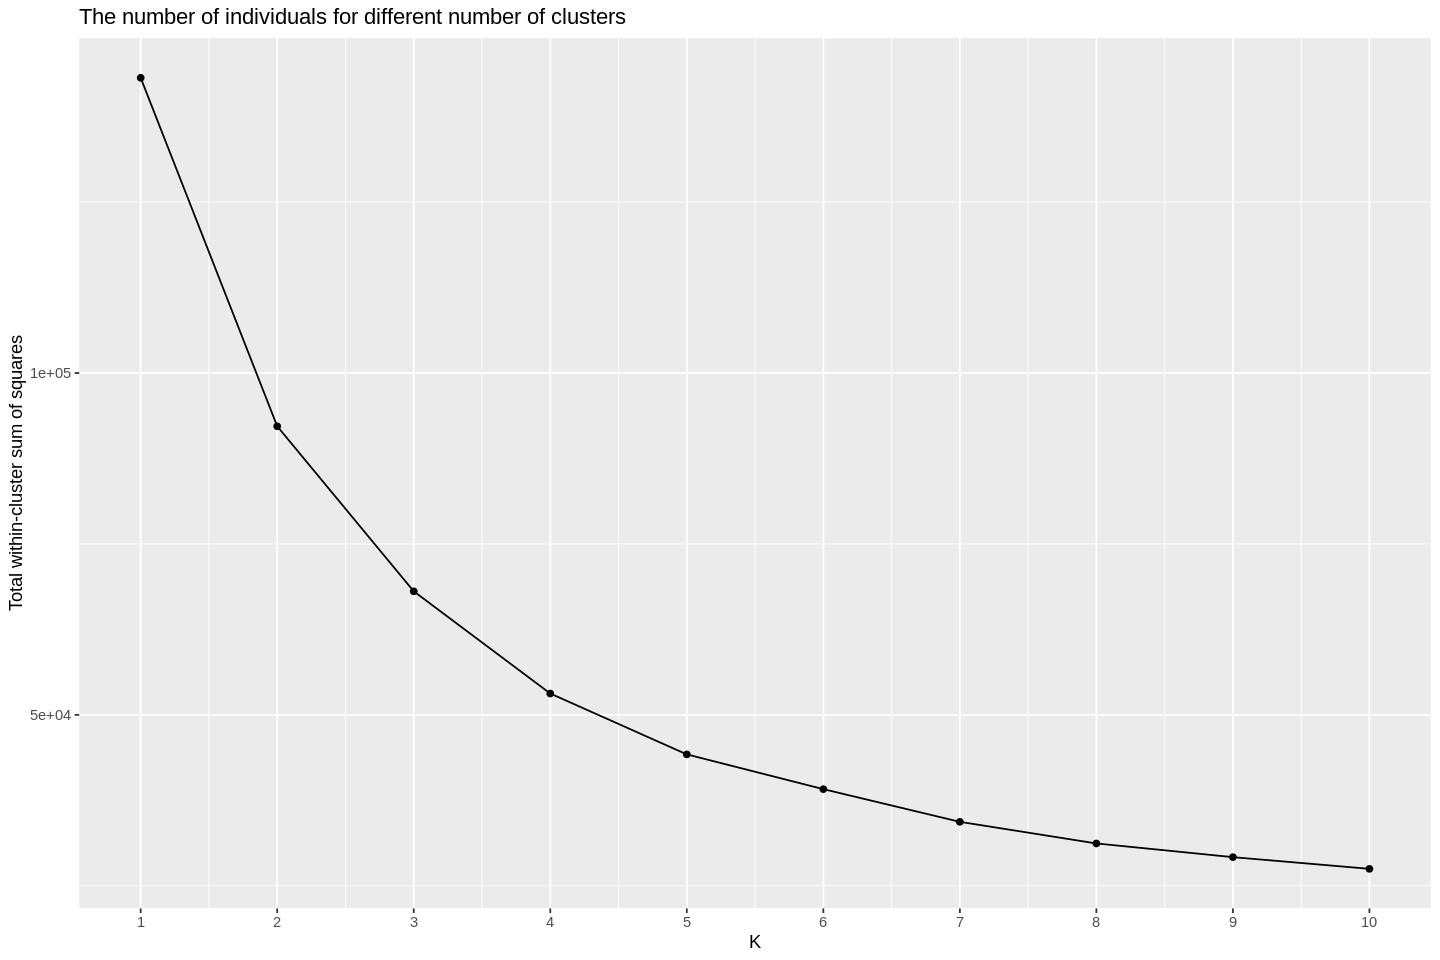

In [25]:
options(repr.plot.height = 8, repr.plot.width = 12)
HTRU_k_plot<-ggplot(HTRU_stats,aes(x=k,y=tot.withinss))+
    geom_point()+
    geom_line()+
    labs(x="K",y="Total within-cluster sum of squares")+
    scale_x_continuous(breaks = 1:10) +
    ggtitle('The number of individuals for different number of clusters')
HTRU_k_plot

                                           figure2-1-2

We choose k=3, because increasing k further only decreased the total within-cluster sum of squares a small amount, which means 3 is a effective k value for clustering

In [8]:
set.seed(2024)
HTRU_cluster<-kmeans(scaled_HTRU,center=3,nstart=100)|>
    augment(scaled_HTRU)
head(HTRU_cluster)

mean_pf,sd_pf,exk_pf,skew_pf,mean_ds,sd_ds,exk_ds,skew_ds,.cluster
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>
1.1492849,1.33479435,-0.66955083,-0.4004478,-0.3194313,-0.3706151,-0.07279575,-0.2874301,1
-0.3341589,1.80221498,-0.01178443,-0.3705251,-0.3710915,-0.5889076,0.50441285,0.2115755,1
-0.3143634,-1.05329280,-0.14522850,-0.1165896,-0.3220980,-0.2353216,-0.12599257,-0.3913625,1
1.0006664,1.55321102,-0.51339427,-0.3901672,-0.3043957,-0.2756588,-0.31225666,-0.4812869,1
-0.8713781,-0.85885481,0.11560548,-0.1048632,-0.3879995,-0.7630898,1.32398915,1.3867553,1
-0.6825595,0.02171238,0.05079471,-0.2194515,-0.3724816,-0.6050896,0.51445740,0.2491331,1


                                          table2-1-2

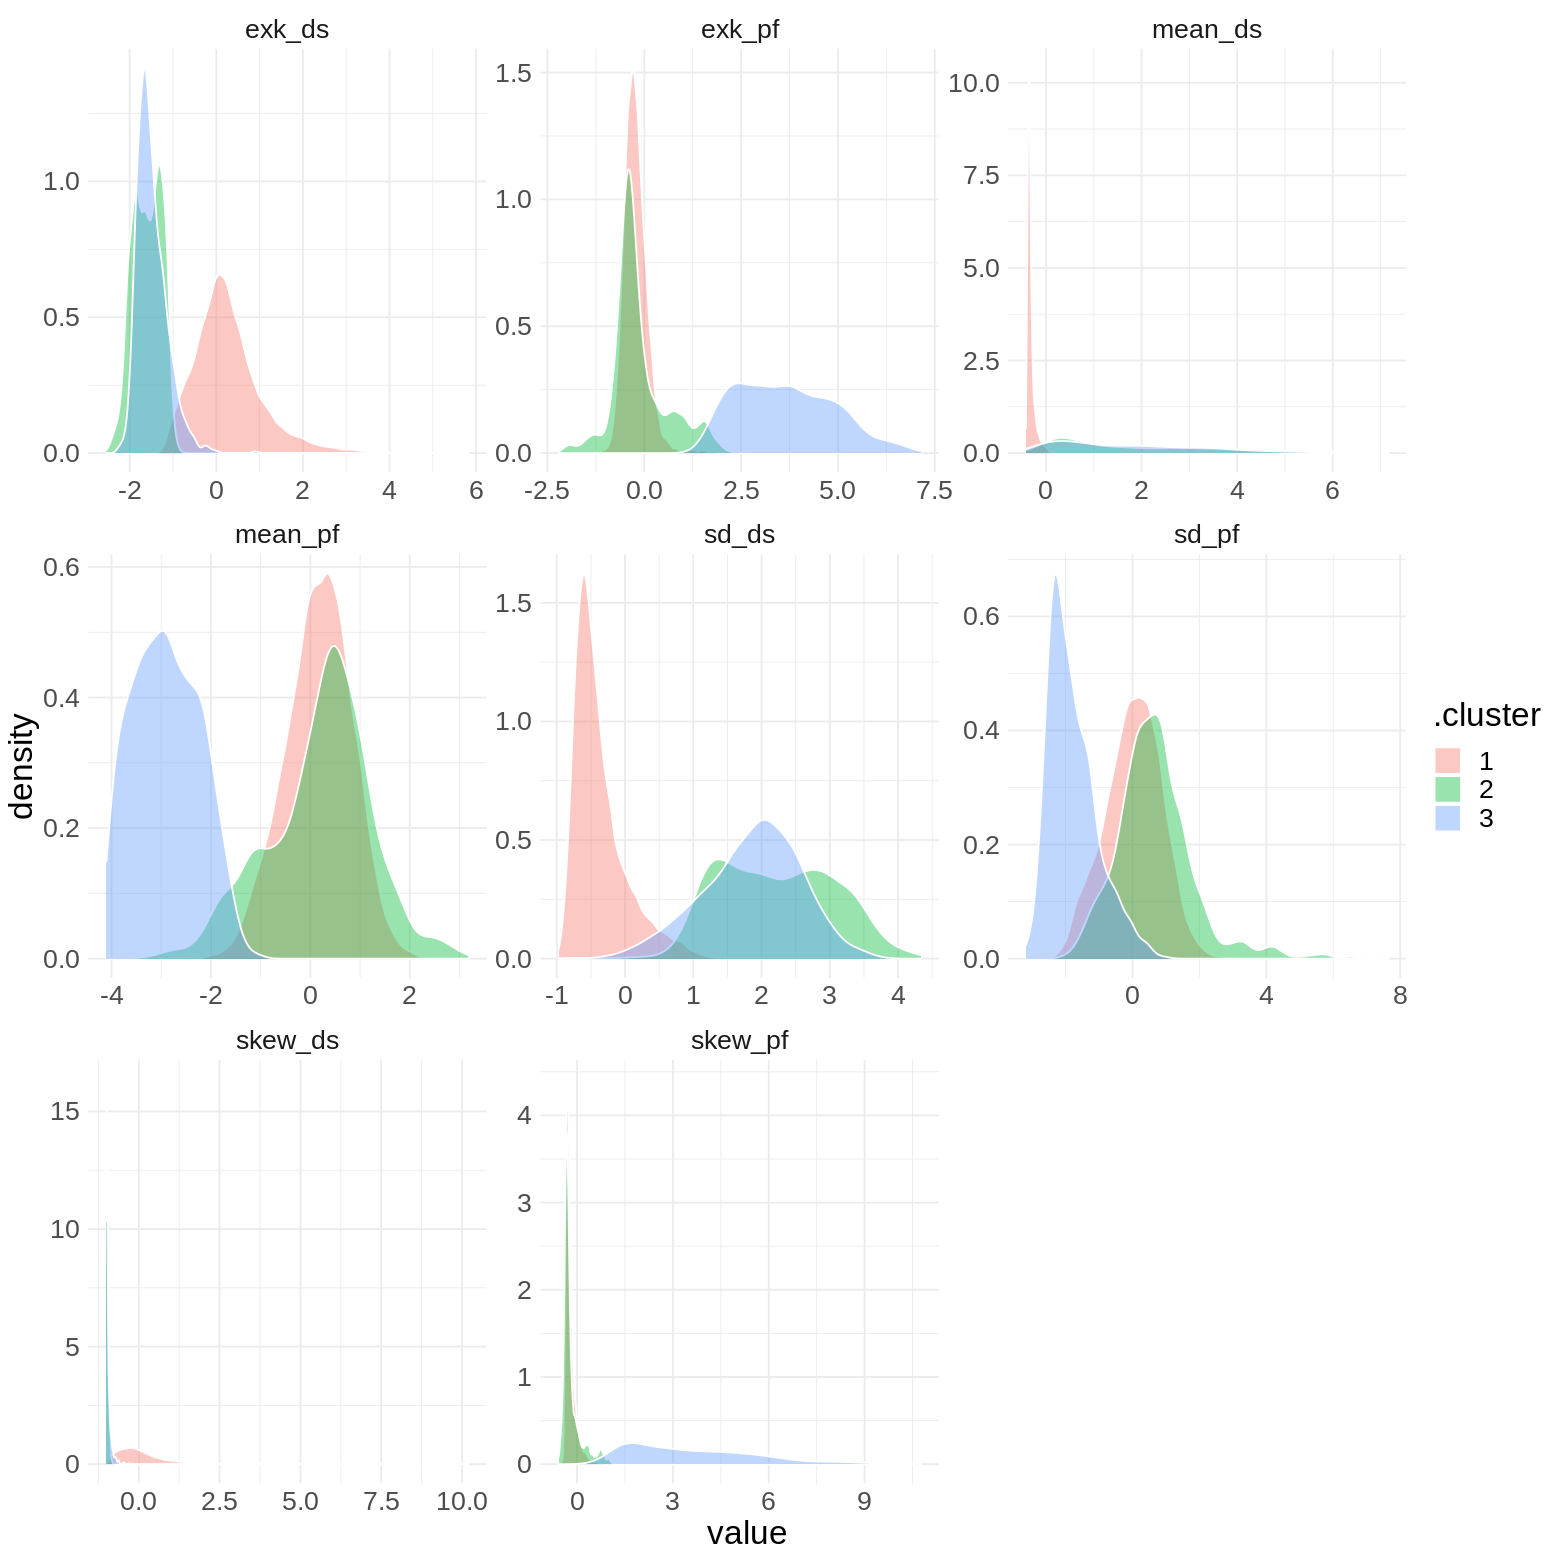

In [22]:
options(repr.plot.height = 13, repr.plot.width = 13)
HTRU_cluster_plot<-HTRU_cluster |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))
HTRU_cluster_plot

                                   figure2-1-3

According to figure2-1-3 and figure2-1-1, we choose the predictors：exk_ds, mean_pf, sd_ds, skew_ds due to their relatively large relevance and clear separation on differnet clusters.

### 2.Prediction model by Classification

1.Preliminary exploratory data analysis

In [60]:
HTRU_pre_data<-HTRU_data|>
    mutate(class=as_factor(class))|>
    select(exk_ds,mean_pf,sd_ds,skew_ds,class)
head(HTRU_pre_data)

exk_ds,mean_pf,sd_ds,skew_ds,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.975532,140.56250,19.11043,74.24222,0
10.576487,102.50781,14.86015,127.39358,0
7.735822,103.01562,21.74467,63.17191,0
6.896499,136.75000,20.95928,53.59366,0
14.269573,88.72656,11.46872,252.56731,0
10.621748,93.57031,14.54507,131.39400,0


       table2-2-1

In [65]:
observations<-HTRU_pre_data|>
    group_by(class)|>
    summarize(n=n())
observations

class,n
<fct>,<int>
0,16259
1,1639


     table2-2-2

From table2-1-1, we can see the scales of some variables have large difference, so we need to standardize the dataset first.
By table2-2-2, we can see most (90.84%) of the data are classified as 0(negative), which means most of the observations can not be considered as pulsar. Therefore, our data set is imbalanced. To explain, in this case, our k-nearest classification prediction model will more likely to classify the observations as 0, because the algorithm will train the model just like what our training data like. Hence, the imbalanced dataset will greatly influence precision of model.

In [45]:
R

ERROR: Error in eval(expr, envir, enclos): object 'R' not found


In [46]:
R.install.packages("themis")
library(themis)
HTRU_recipe<-recipe(class~.,data=HTRU_pre_data)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())|>
    step_upsample(Class, over_ratio = 1, skip = FALSE) |>
    prep()

ERROR: Error in R.install.packages("themis"): could not find function "R.install.packages"


        table2-2-2

In [16]:
HTRU_var_plot<-ggpairs(standardized_HTRU,columns=1:4,aes(color=class))

ERROR: Error in ggpairs(standardized_HTRU, columns = 1:4, aes(color = class)): could not find function "ggpairs"


Refer to figure2-2-1 and table2-2-2, we can see most of the data are classified as 0(negative), which means most of the observations can not be considered as pulsar. Therefore, our data set is imbalanced.

In [38]:
HTRU_split <- initial_split(HTRU_pre_data, prop = 0.75, strata = class)  
HTRU_train <- training(HTRU_split)   
HTRU_test <- testing(HTRU_split)

# Discussion

# Reference